**Importing packages**

In [ ]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import shutil
import random
import cv2

from PIL import Image
import pickle


import tensorflow as tf
print(tf.config.list_physical_devices('GPU'))


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [ ]:
physical_devices = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)
tf.config.experimental.set_visible_devices(physical_devices[0], 'GPU')

In [ ]:
num_cpus = tf.config.experimental.list_physical_devices('CPU')
print(num_cpus)

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]


**Constructing Validation set**

In [ ]:
#Retrieve val data and take it apart
source_directory="skycamera_images - Copie"
destination_directory="Val_set_folder"
print(len(os.listdir(source_directory)))

def construct_val_set(source_directory,destination_directory,val_per=0.15):

    file_list = os.listdir(source_directory)
    random.shuffle(file_list)
    #test_per=0.1
    #if os.path.exists(destination_directory):
    #        shutil.rmtree(destination_directory)
    #os.makedirs(destination_directory)
    
    nbre_files=int(val_per*len(file_list))
    selected_files = file_list[:nbre_files]
    
    for file_name in selected_files:
        source_path_img = os.path.join(source_directory, file_name)
        destination_path_img = os.path.join(destination_directory,"images", file_name)
        shutil.move(source_path_img, destination_path_img)

        source_path_label = os.path.join("labels_new", file_name)
        destination_path_label = os.path.join(destination_directory,"labels", file_name)
        shutil.move(source_path_label, destination_path_label)

        print(f"Moved {file_name} to {destination_directory}")



construct_val_set(source_directory,destination_directory,0.15)


357
Moved 2022-06-02 to Val_set_folder
Moved 2021-12-24 to Val_set_folder
Moved 2022-03-20 to Val_set_folder
Moved 2021-08-10 to Val_set_folder
Moved 2021-06-27 to Val_set_folder
Moved 2022-06-18 to Val_set_folder
Moved 2022-06-24 to Val_set_folder
Moved 2021-12-21 to Val_set_folder
Moved 2022-05-31 to Val_set_folder
Moved 2022-08-26 to Val_set_folder
Moved 2022-10-06 to Val_set_folder
Moved 2021-09-13 to Val_set_folder
Moved 2021-11-15 to Val_set_folder
Moved 2022-08-08 to Val_set_folder
Moved 2021-09-15 to Val_set_folder
Moved 2022-06-14 to Val_set_folder
Moved 2021-11-24 to Val_set_folder


**Constructing test set folder**

In [ ]:
#Retrieve test data and take it apart
source_directory="skycamera_images - Copie"
destination_directory="Test_set_folder"
print(len(os.listdir(source_directory)))

def construct_test_set(source_directory,destination_directory,test_per=0.1):

    file_list = os.listdir(source_directory)
    random.shuffle(file_list)
    #test_per=0.1
    if os.path.exists(destination_directory):
            shutil.rmtree(destination_directory)
    os.makedirs(destination_directory)
    
    nbre_files=int(test_per*len(file_list))
    selected_files = file_list[:nbre_files]
    
    for file_name in selected_files:
        source_path_img = os.path.join(source_directory, file_name)
        destination_path_img = os.path.join(destination_directory,"images", file_name)
        shutil.move(source_path_img, destination_path_img)

        source_path_label = os.path.join("labels_new", file_name)
        destination_path_label = os.path.join(destination_directory,"labels", file_name)
        shutil.move(source_path_label, destination_path_label)

        print(f"Moved {file_name} to {destination_directory}")



construct_test_set(source_directory,destination_directory,0.1)


439
Moved 2021-07-02 to Test_set_folder
Moved 2022-03-22 to Test_set_folder
Moved 2022-04-19 to Test_set_folder
Moved 2022-04-11 to Test_set_folder
Moved 2022-05-09 to Test_set_folder
Moved 2022-05-20 to Test_set_folder
Moved 2022-10-14 to Test_set_folder
Moved 2022-11-04 to Test_set_folder
Moved 2022-01-12 to Test_set_folder
Moved 2021-07-08 to Test_set_folder
Moved 2022-04-24 to Test_set_folder
Moved 2021-07-16 to Test_set_folder
Moved 2022-06-20 to Test_set_folder
Moved 2022-11-12 to Test_set_folder
Moved 2022-06-16 to Test_set_folder
Moved 2022-11-20 to Test_set_folder
Moved 2022-12-03 to Test_set_folder
Moved 2022-04-08 to Test_set_folder
Moved 2022-09-18 to Test_set_folder
Moved 2021-11-27 to Test_set_folder
Moved 2022-11-17 to Test_set_folder
Moved 2022-08-23 to Test_set_folder
Moved 2022-11-11 to Test_set_folder
Moved 2022-02-05 to Test_set_folder
Moved 2021-09-24 to Test_set_folder
Moved 2021-07-31 to Test_set_folder
Moved 2021-11-17 to Test_set_folder
Moved 2022-03-05 to Test

In [ ]:
for element in tf_data.take(5):
    print(element.numpy())
print(len(list(tf_data)))


b'skycamera_images - Copie\\2021-08-03\\16-32.jpg'
b'skycamera_images - Copie\\2022-05-25\\05-35.jpg'
b'skycamera_images - Copie\\2022-05-26\\07-43.jpg'
b'skycamera_images - Copie\\2022-05-26\\12-38.jpg'
b'skycamera_images - Copie\\2021-08-21\\07-11.jpg'


In [ ]:
str_=b'DATA_copie\\2021-11-04\\08-24.jpg'
str_=str_.decode()
str_=os.path.join("labels",str_.split("\\")[1],str_.split("\\")[2].split(".")[0]+".txt")
#print(str_)

for element in tf_data.map(get_label).take(5):
    print(element)

tf.Tensor(b'labels_new\\2021-08-26\\14-43.txt', shape=(), dtype=string)
tf.Tensor(b'labels_new\\2022-12-01\\14-11.txt', shape=(), dtype=string)
tf.Tensor(b'labels_new\\2022-05-28\\10-59.txt', shape=(), dtype=string)
tf.Tensor(b'labels_new\\2022-09-30\\08-59.txt', shape=(), dtype=string)
tf.Tensor(b'labels_new\\2022-04-25\\12-14.txt', shape=(), dtype=string)


**Displaying a preprocessed image**

(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.00392157, 0.00392157, 0.00392157],
        [0.00688275, 0.00688275, 0.00688275],
        [0.00392157, 0.00392157, 0.00392157],
        ...,
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ]],

       [[0.00110044, 0.00110044, 0.00110044],
        [0.8433974 , 0.8433974 , 0.8433974 ],
        [0.        , 0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ]],

       [[0.07869142, 0.07869142, 0.07869142],
        [0.4658467 , 0.4658467 , 0.4658467 ],
        [0.01734694, 0.01734694, 0.01734694],
        ...,
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ]],

       ...,

       [[0.        , 0.        , 0.        ],
        [0. 

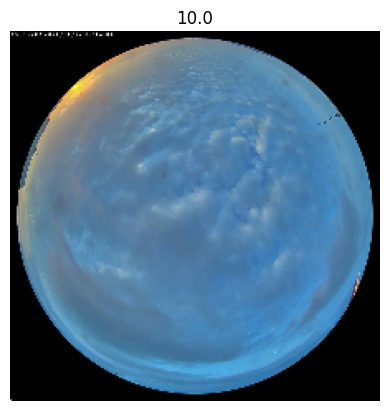

In [ ]:
file_path = list(tf_data)[100]
image, label = process_img_label(file_path)

def show(image, label):
  plt.figure()
  print(image.shape)
  print(image)
  plt.imshow(image)
  plt.title(label.numpy())
  plt.axis('off')

show(image, label)

In [ ]:
for element in val_ds.take(6):
    print(element.numpy())

b'Val_set_folder\\images\\2022-11-28\\14-30.jpg'
b'Val_set_folder\\images\\2021-06-30\\14-42.jpg'
b'Val_set_folder\\images\\2021-09-15\\11-21.jpg'
b'Val_set_folder\\images\\2021-12-21\\12-23.jpg'
b'Val_set_folder\\images\\2022-04-09\\15-42.jpg'
b'Val_set_folder\\images\\2022-03-11\\06-23.jpg'
